## This file shows the whole analysis for the Apple Stock for 2-3 days with high-frequency trading from 9:30 am to 4 pm

#### The code reads a CSV file, renames its columns, and splits the "Date and Time" column into separate "Date" and "Time" columns in a Pandas DataFrame for the stock data of ticker Apple on October 18, 2016, with minute-level OHLCV information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'sp500_tickers_A-D_1min_1pppix/AA_1min.csv')
# This line renames the columns by the type of thing they represent
df.rename(columns={'2016-10-18 04:04:00': 'Date and Time', '26.5376': 'Open', '26.5376.1': 'High', '26.5376.2': 'Low', '26.5376.3': 'Close', '100': 'Volume'}, inplace=True)
df[['Date', 'Time']] = df['Date and Time'].str.split(' ', expand=True)
print(df.head())

         Date and Time     Open     High      Low    Close  Volume  \
0  2016-10-18 04:10:00  26.5873  26.5972  26.5873  26.5972     400   
1  2016-10-18 04:11:00  26.5972  26.5972  26.5873  26.5873     700   
2  2016-10-18 04:14:00  26.5773  26.5773  26.5376  26.5376     700   
3  2016-10-18 06:30:00  26.5376  26.5376  26.5376  26.5376     500   
4  2016-10-18 06:43:00  26.5574  26.5574  26.5475  26.5475    1000   

         Date      Time  
0  2016-10-18  04:10:00  
1  2016-10-18  04:11:00  
2  2016-10-18  04:14:00  
3  2016-10-18  06:30:00  
4  2016-10-18  06:43:00  


In [2]:
df.drop(['Date and Time'], axis =1) # Drop the existing data and time column as separated column is available
df = df[['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']] # Rearranging the columns in a particular order
print(df.head())

         Date      Time     Open     High      Low    Close  Volume
0  2016-10-18  04:10:00  26.5873  26.5972  26.5873  26.5972     400
1  2016-10-18  04:11:00  26.5972  26.5972  26.5873  26.5873     700
2  2016-10-18  04:14:00  26.5773  26.5773  26.5376  26.5376     700
3  2016-10-18  06:30:00  26.5376  26.5376  26.5376  26.5376     500
4  2016-10-18  06:43:00  26.5574  26.5574  26.5475  26.5475    1000


In [3]:
df2 = df.loc[(df['Time'] >= '09:30:00') & (df['Time'] <= '16:00:00') & (df['Date'] == '2016-10-18')] # Filtering values from 9:30 am to 4 pm on a particular date
print(df2)
df4 = df2.loc[(df['Time'] >= '09:30:00') & (df['Time'] <= '10:00:00')]

           Date      Time     Open     High      Low    Close  Volume
45   2016-10-18  09:30:00  26.4084  26.5077  26.4084  26.4481  167664
46   2016-10-18  09:31:00  26.4779  26.4978  26.3587  26.3686   74660
47   2016-10-18  09:32:00  26.3587  26.3587  26.0903  26.0903   81956
48   2016-10-18  09:33:00  26.1002  26.1201  26.0108  26.0694   61398
49   2016-10-18  09:34:00  26.0804  26.1301  26.0605  26.1201   92378
..          ...       ...      ...      ...      ...      ...     ...
431  2016-10-18  15:56:00  26.3686  26.3686  26.3537  26.3537   82206
432  2016-10-18  15:57:00  26.3537  26.3636  26.3189  26.3288   92396
433  2016-10-18  15:58:00  26.3239  26.3487  26.3189  26.3487   62267
434  2016-10-18  15:59:00  26.3438  26.3487  26.3388  26.3388  100134
435  2016-10-18  16:00:00  26.3487  26.3487  26.3487  26.3487  609222

[391 rows x 7 columns]


## Q1

#### Plotting the Closing Price against the time for a particular date i.e. 2016-10-18 using Matplotlib

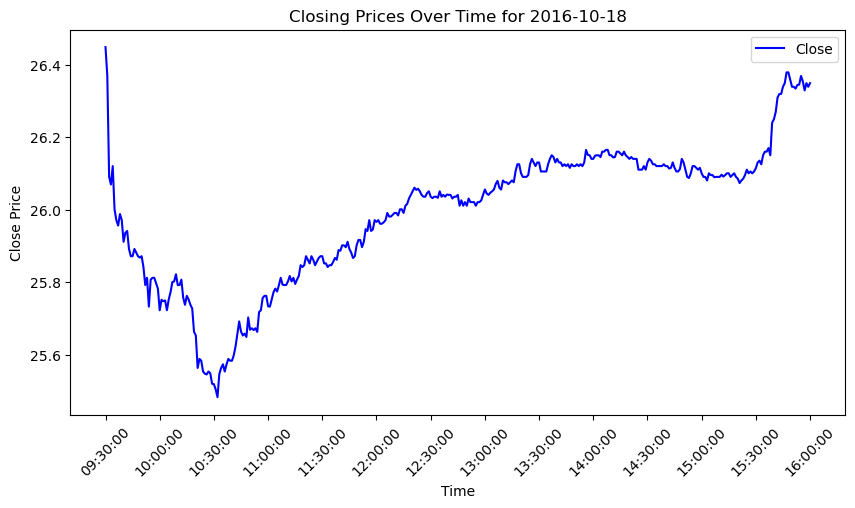

In [4]:

import plotly.graph_objects as go
from datetime import datetime

df2.plot(x = 'Time', y= 'Close', kind = 'line', figsize=(10, 5), color = 'Blue')

# Add chart title
plt.title('Closing Prices Over Time for 2016-10-18')

# Add axis titles
plt.xlabel('Time')
plt.ylabel('Close Price')

# Customize x-axis tick positions and labels (30-minute intervals)
xtick_positions = range(0, len(df2), 30)  # Tick positions at 30-minute intervals
xtick_labels = df2['Time'].iloc[xtick_positions]  # Corresponding time labels

# Set the x-axis ticks
plt.xticks(xtick_positions, xtick_labels, rotation=45)  # Adjusted rotation 
plt.show()


### Plotting day-wise closing prices i.e. the closing price for at 4 pm for every day in the dataset 

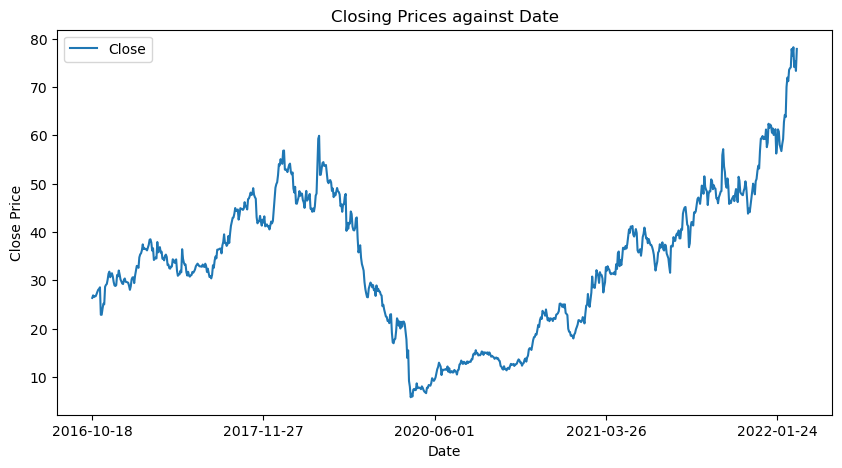

In [5]:
df3 = df.loc[(df['Time'] == '16:00:00')] # Filtering values of day by day closing price
df3.plot(x = 'Date', y= 'Close', kind = 'line', figsize=(10, 5))

# Add chart title
plt.title('Closing Prices against Date')

# Add axis titles
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

### Plotting values from 9:30 am to 10 am on candlestick chart with Volume on secondary Y-axis denoted by light blue scattered dots

          Date      Time     Open     High      Low    Close  Volume
45  2016-10-18  09:30:00  26.4084  26.5077  26.4084  26.4481  167664
49  2016-10-18  09:34:00  26.0804  26.1301  26.0605  26.1201   92378
53  2016-10-18  09:38:00  25.9611  25.9879  25.9114  25.9879   70513
56  2016-10-18  09:41:00  25.9064  25.9412  25.9064  25.9362   47449
57  2016-10-18  09:42:00  25.9362  25.9412  25.9015  25.9412  112806
60  2016-10-18  09:45:00  25.8716  25.9213  25.8716  25.8716   44224
61  2016-10-18  09:46:00  25.8716  25.8915  25.8677  25.8915   27704
65  2016-10-18  09:50:00  25.8716  25.8965  25.8617  25.8716   68581
68  2016-10-18  09:53:00  25.7822  25.8219  25.7822  25.8120   48031
70  2016-10-18  09:55:00  25.7375  25.8070  25.7226  25.8070   63598
71  2016-10-18  09:56:00  25.8120  25.8309  25.8120  25.8120   25783
72  2016-10-18  09:57:00  25.8120  25.8219  25.8021  25.8120   14445


Text(0, 0.5, 'Volume in Thousands')

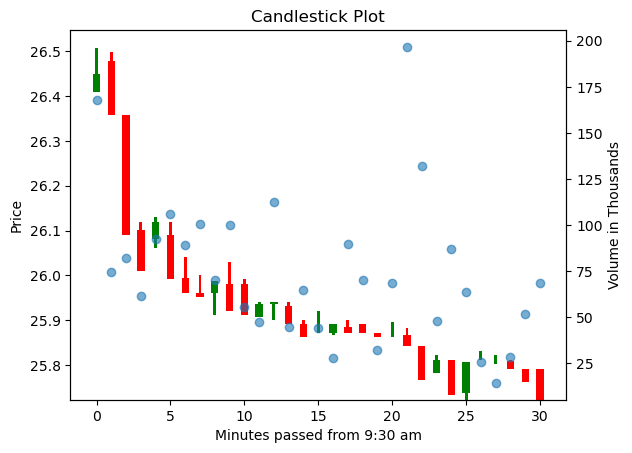

In [6]:
# Filtering the stocks to assist in plotting of bar graph
up = df4[df4['Close'] >= df4['Open']]
down = df4[df4['Close'] < df4['Open']]
print(up)

# Choosing green for stocks where close >= open and red when open > close
col1 = 'green'
col2 = 'red'

width = .5
width2 = .2
# Making 3 bars at the same place of different widths whose lengths are equal to the differences in the prices of these quantities
plt.bar(up.index -45, up['Close']-up['Open'], width, bottom = up['Open'], color = col1)
plt.bar(up.index -45, up['High']-up['Close'], width2, bottom = up['Close'], color = col1)
plt.bar(up.index -45, up['Low']-up['Open'], width2, bottom = up['Open'], color = col1)

## Making 3 bars at the same place of different widths whose lengths are equal to the differences in the prices of these quantities
plt.bar(down.index-45, down['Close']-down['Open'], width, bottom = down['Open'], color = col2)
plt.bar(down.index-45, down['High']-down['Open'], width2, bottom = down['Open'], color = col2)
plt.bar(down.index-45, down['Low']-down['Close'], width, bottom = down['Close'], color = col2)
plt.title('Candlestick Plot')

# Add axis titles
plt.xlabel('Minutes passed from 9:30 am')
plt.ylabel('Price')

# Making a twin of X -axis to plot the volume on secondary Y-axis
ax1 = plt.twinx()
ax1.scatter(df4.index - 45, df4['Volume']/1000, alpha = 0.6) # Alpha controls the opacity of the scatter plot dots
ax1.set_ylabel('Volume in Thousands')

### Observations

##### (1) The trade volume has a very high variance

##### (2) The price of the stock is continously falling in this time interval 

## Q2

#### Making a normalization function called min-max scaler

In [7]:
def normdata(data):
    mini = data.min()
    maxa = data.max()
    x = data

    y = (x- mini) / (maxa - mini)
    return y

#### Evaluating the Normalized value of the Closing Price and the Volume using normdata function

In [8]:
df2.loc[:, 'Normalized_Close'] = normdata(df2['Close']) 
df2.loc[:, 'Normalized_Volume'] = normdata(df2['Volume'])
df2.loc[:, 'Normalized_Open'] = normdata(df2['Open'])
df2.loc[:, 'Normalized_High'] = normdata(df2['High'])
df2.loc[:, 'Normalized_Low'] = normdata(df2['Low'])

print(len(df2['Normalized_Open']))
print(df2['Normalized_Open'].head(10))


391
45    0.930214
46    1.000000
47    0.880309
48    0.620745
49    0.600864
50    0.610804
51    0.514007
52    0.481072
53    0.481072
54    0.501054
Name: Normalized_Open, dtype: float64


/tmp/ipykernel_22230/1352371986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Normalized_Close'] = normdata(df2['Close'])
/tmp/ipykernel_22230/1352371986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Normalized_Volume'] = normdata(df2['Volume'])
/tmp/ipykernel_22230/1352371986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

### Evaluating the Z Scores of the Closing price and the Volume by using Scipy library

In [9]:
import scipy.stats as st

# Z score is (x-mu/sigma) for every x in the dataframe where mu is the mean and sigma is the standard deviation
# Using .loc function to make sure we are making changes to the original dataframe only
df2.loc[:, 'Zscore_Close'] = st.zscore(df2['Close'])
df2.loc[:, 'Zscore_Volume'] = st.zscore(df2['Volume'])
print(df2['Zscore_Volume'].head())

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


45    2.932320
46    0.933825
47    1.090603
48    0.648848
49    1.314554
Name: Zscore_Volume, dtype: float64


/tmp/ipykernel_22230/4036478675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Zscore_Close'] = st.zscore(df2['Close'])
/tmp/ipykernel_22230/4036478675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Zscore_Volume'] = st.zscore(df2['Volume'])


### In my opinion the min-max scaler technique would be better indicator as that scales all the available data linearly between the minimum and maximum value

### We can use this normalization as input to train LSTM model and use it to test the model on the price some other data by inverting the normalization process

## Q3


### Choosing High-Frequency Trading for Analysis

#### Calculating the bid-ask spread and the commissions based on some assumptions

#### In this file I will trade only Apple, in the other file I will trade only Arista Network(ANET), in the 3rd file I will trade Apple based on model trained on ANET and Apple both as both belong to Telecom industry

In [10]:
df2.loc[:, 'Bid_Ask_Spread'] = df2['Open']/ df2['Volume']*3000 # Take the Bid_ask spread as the ratio of the opening Price and the Volume multiplied by a constant
df2.loc[:, 'Commission'] = ((df2['Open'] + df2['Close'] + df2['High'] + df2['Low'])/4) * df2['Volume'] *0.01 # Commission is 0.05% of the avearge price of the stock traded multiplied by the volume
print(df2['Commission'].head(10))
print(df2['Bid_Ask_Spread'].head(10))

45    44335.643016
46    19729.464950
47    21492.551220
48    16009.605248
49    24108.602590
50    27590.137505
51    23158.560150
52    26128.841761
53    18306.637945
54    26006.132160
Name: Commission, dtype: float64
45    0.472524
46    1.063939
47    0.964860
48    1.275296
49    0.846968
50    0.739032
51    0.875215
52    0.774019
53    1.104524
54    0.778527
Name: Bid_Ask_Spread, dtype: float64


/tmp/ipykernel_22230/1325259134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Bid_Ask_Spread'] = df2['Open']/ df2['Volume']*3000 # Take the Bid_ask spread as the ratio of the opening Price and the Volume multiplied by a constant
/tmp/ipykernel_22230/1325259134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Commission'] = ((df2['Open'] + df2['Close'] + df2['High'] + df2['Low'])/4) * df2['Volume'] *0.01 # Commission is 0.05% of the avearge price of the stock traded multiplie

#### Importing Torch

In [11]:
import torch
import torch.nn as nn

## Q4

### Defining a LSTM class with adjustable dimensions of input layer, output layer, hidden layer and the number of LSTM layers

In [12]:
class LSTMModel(nn.Module): # LSTMMoel imports from nn.Module which is the base class for all PyTorch Modules
    def __init__(self, input_d, hidden_d, layer_d, output_d):
        super(LSTMModel, self).__init__() # Using the superclass to import functions
        
        self.hidden_dim = hidden_d
        self.layer_dim = layer_d

    # LSTM model 

        #Creates an LSTM layer using PyTorch's nn.LSTM class. 
        #It specifies the input dimension, hidden dimension, number of layers, and batch_first=True indicates that the input data will have the batch size as the first dimension.
        self.lstm = nn.LSTM(input_d, hidden_d, layer_d, batch_first=True) 

        #This line defines a fully connected (linear) layer
        self.fc = nn.Linear(hidden_d, output_d)

    def forward(self, x):
    
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        #The LSTM processes the input sequence x and produces two outputs:
        #out: A tensor containing the LSTM's hidden states for each time step in the sequence.
        #(hn, cn): Tuples containing the final hidden state and cell state of the LSTM after processing the entire sequence.
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Extracting the hidden state of the last timestamp
        out = self.fc(out[:, -1, :]) 
        #out = torch.sigmoid(out)(Can be included if we want non-linearity)
        return out

# Flexibilty to set the dimensions according to our needs
input_dim = 5 # Inputs are volume and the 4 prices(Open, close, High and Low)
hidden_dim = 500
output_dim = 1 # Output is the closing price only
layer_dim = 1 # Only 1 LSTM layer used

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

#step 4: calculating cross entropy loss
#loss_fn = nn.BCELoss()

# Using the Mean Squared Error Loss function to evaluate the model and minimise the training error
loss_fn = nn.MSELoss()

# Tuning the learning rate for good results and to avoid problems like stucking at local minima
learning_rate = 0.13

# Using the adam optimizer from Pytorch to optimize the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Q5

### Preparing the Data to give to Dataloader

#### Converting the required data into X and y and converting them to numpy arrays followed by making them tensors snd reshaping them to appropraite dimensions for the dataloader


In [13]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

# Read data, convert to NumPy arrays
# Converting the 5 columns into a 2-D Numpy array except the last entry
X = df2[['Normalized_Open', 'Normalized_High', 'Normalized_Low', 'Normalized_Close', 'Normalized_Volume']][:-1].to_numpy() 

# The normalized close price which we want to predict is being passed for training by shifting it by 1 unit as we are training model to remember the previous data to predict data of the next timestamp
y = df2['Normalized_Close'][1:].to_numpy()


# convert into PyTorch tensors so as to load into Dataloader
X = torch.tensor(X, dtype=torch.float32).reshape(X.shape[0], 1, -1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

print(X.shape) # To check the shape of the input tensors and identify for bugs in the code
print(y.shape)

torch.Size([390, 1, 5])
torch.Size([390, 1])


#### Loading the data into Dataloader and keeping the shuffle = False to keep the values in sequence of their Timestamps

In [14]:
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
 
# train-test split for evaluation of the model
# Training on 1st 380 timestamps of the day and testing on the last 10 for that day
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=380/390, shuffle=False)
print(y_test)

# set up DataLoader for training the data
loader = DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=75)
 
# Train the model with 200 epochs
n_epochs = 200
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch) # Predicting the y_value
        #print(y_pred)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
print(y_pred)
acc = (abs(y_pred- y_test) <.013).float().mean()
acc = float(acc)
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()
print(((sum((y_pred - y_test)**2))**0.5)/len(X_test))
#test_loss = loss_fn(y_pred, y_test).item()  # Calculate the loss and get the scalar value
#test_rmse = np.sqrt(test_loss)  # Take the square root of the scalar loss
#test_rmse = np.sqrt(loss_fn(y_pred, y_test))
#print("Model accuracy: %.2f%%" % (acc*100))
#print("Model Loss:", test_rmse)

tensor([[0.8867],
        [0.8816],
        [0.8919],
        [0.8929],
        [0.9176],
        [0.9022],
        [0.8764],
        [0.8970],
        [0.8867],
        [0.8970]])
tensor([[0.8966],
        [0.8809],
        [0.8802],
        [0.9020],
        [0.9266],
        [0.9410],
        [0.9175],
        [0.9010],
        [0.8940],
        [0.9100]], grad_fn=<AddmmBackward0>)
[0.00619172]


### Testing the trained model on next day's prices

In [15]:
df_test_next_day = df.loc[(df['Time'] >= '09:30:00') & (df['Time'] <= '16:00:00') & (df['Date'] == '2016-10-19')]

max_p_next_day = df_test_next_day['Close'].max()
min_p_next_day = df_test_next_day['Close'].min()

df_test_next_day.loc[:, 'Normalized_Close'] = normdata(df_test_next_day['Close'])
df_test_next_day.loc[:, 'Normalized_Volume'] = normdata(df_test_next_day['Volume'])
df_test_next_day.loc[:, 'Normalized_Open'] = normdata(df_test_next_day['Open'])
df_test_next_day.loc[:, 'Normalized_High'] = normdata(df_test_next_day['High'])
df_test_next_day.loc[:, 'Normalized_Low'] = normdata(df_test_next_day['Low'])

X = df_test_next_day[['Normalized_Close', 'Normalized_High', 'Normalized_Low', 'Normalized_Close', 'Normalized_Volume']][:390].to_numpy() # Converting the 5 columns into a 2-D Numpy array
y = df_test_next_day['Normalized_Close'][1:391].to_numpy()
#print(X)


X = torch.tensor(X, dtype=torch.float32).reshape(X.shape[0], 1, -1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=16)
# for X_batch, y_batch in loader:
#     #print(y_batch)
#     break

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1, shuffle=False)
#print(X_test)
loader = DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=75)
actual_price  = df_test_next_day['Close'][2:391]
#print(actual_price)

model.eval()
y_pred = model(X_test)
predicted_price = y_pred*(max_p_next_day - min_p_next_day) + min_p_next_day
#print(predicted_price)
#acc = (abs(y_pred- y_test) <.013).float().mean()
#acc = float(acc)
predicted_price = predicted_price.detach().numpy()
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()
print(((sum((y_pred - y_test)**2))**0.5))
print(predicted_price.reshape(1,-1))
actual_price = actual_price.to_numpy()
#print(actual_price)


[0.61946565]
[[26.351463 26.372961 26.37669  26.364597 26.345423 26.369072 26.383991
  26.398165 26.422365 26.349451 26.373724 26.359858 26.356953 26.339487
  26.285385 26.392086 26.385403 26.313847 26.320475 26.372807 26.372736
  26.388514 26.376678 26.370426 26.262785 26.266008 26.286478 26.35008
  26.38269  26.372652 26.349123 26.394657 26.345943 26.380442 26.316006
  26.368202 26.371782 26.388712 26.384132 26.385557 26.354475 26.369871
  26.410666 26.42796  26.386715 26.399097 26.421183 26.398222 26.411325
  26.427002 26.440762 26.437439 26.446552 26.456453 26.450592 26.464787
  26.499086 26.498312 26.537174 26.565784 26.573414 26.553932 26.545212
  26.542524 26.567808 26.561966 26.569582 26.566761 26.574156 26.577919
  26.60231  26.593699 26.62755  26.664434 26.692017 26.71591  26.70198
  26.721872 26.73882  26.75262  26.756458 26.78989  26.799438 26.819214
  26.827492 26.815601 26.825644 26.848463 26.85264  26.882366 26.879868
  26.870462 26.868618 26.87354  26.880472 26.86719  2

/tmp/ipykernel_22230/3356479963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_next_day.loc[:, 'Normalized_Close'] = normdata(df_test_next_day['Close'])
/tmp/ipykernel_22230/3356479963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_next_day.loc[:, 'Normalized_Volume'] = normdata(df_test_next_day['Volume'])
/tmp/ipykernel_22230/3356479963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

### Plotting the Actual and the Predicted price of the model for the next day

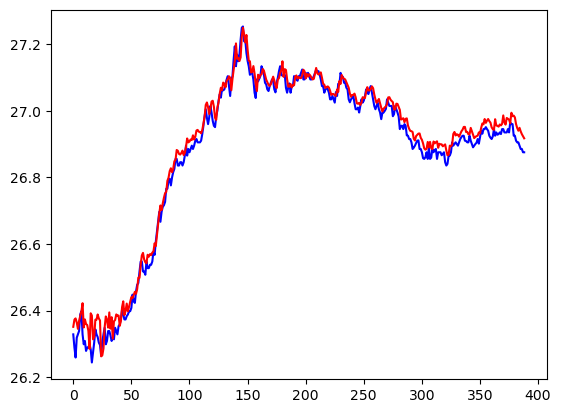

In [16]:
t = np.arange(389) # Taking the data of 389 timestamps hence used this
plt.plot(t, actual_price , color = 'blue') 

plt.plot(t, predicted_price, color = 'red')

### Testing the trained model prices on the next to next day for price prediction

In [17]:
df_test_next1_day = df.loc[(df['Time'] >= '09:30:00') & (df['Time'] <= '16:00:00') & (df['Date'] == '2016-10-20')]

df_test_next1_day['Normalized_Close'] = normdata(df_test_next1_day['Close'])
df_test_next1_day['Normalized_Volume'] = normdata(df_test_next1_day['Volume'])
df_test_next1_day['Normalized_Open'] = normdata(df_test_next1_day['Open'])
df_test_next1_day['Normalized_High'] = normdata(df_test_next1_day['High'])
df_test_next1_day['Normalized_Low'] = normdata(df_test_next1_day['Low'])

X = df_test_next1_day[['Normalized_Close', 'Normalized_High', 'Normalized_Low', 'Normalized_Close', 'Normalized_Volume']][:-1].to_numpy() # Converting the 5 columns into a 2-D Numpy array
y = df_test_next1_day['Normalized_Close'][1:].to_numpy()
print(X.shape)


X = torch.tensor(X, dtype=torch.float32).reshape(X.shape[0], 1, -1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=16)
for X_batch, y_batch in loader:
    #print(y_batch)
    break

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1, shuffle=False)
loader = DataLoader(list(zip(X_train, y_train)), shuffle=False, batch_size=75)
print(y_test)

model.eval()
y_pred = model(X_test)
print(y_pred)
acc = (abs(y_pred- y_test) <.013).float().mean()
acc = float(acc)
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()
print(((sum((y_pred - y_test)**2))**0.5))

(390, 5)
tensor([[0.3744],
        [0.5963],
        [0.3945],
        [0.4495],
        [0.4495],
        [0.4680],
        [0.4789],
        [0.4130],
        [0.3670],
        [0.3376],
        [0.3395],
        [0.4862],
        [0.4680],
        [0.5413],
        [0.5780],
        [0.5780],
        [0.5780],
        [0.5963],
        [0.5413],
        [0.5341],
        [0.5413],
        [0.5413],
        [0.5780],
        [0.5413],
        [0.5616],
        [0.5597],
        [0.5963],
        [0.5597],
        [0.5963],
        [0.5963],
        [0.5798],
        [0.5963],
        [0.6697],
        [0.6624],
        [0.5963],
        [0.5780],
        [0.5780],
        [0.4680],
        [0.4680],
        [0.4405],
        [0.4130],
        [0.4312],
        [0.4130],
        [0.3945],
        [0.3945],
        [0.3578],
        [0.3395],
        [0.3541],
        [0.3212],
        [0.2919],
        [0.2954],
        [0.3028],
        [0.2845],
        [0.2477],
        [0.1835],
 

/tmp/ipykernel_22230/3313775693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_next1_day['Normalized_Close'] = normdata(df_test_next1_day['Close'])
/tmp/ipykernel_22230/3313775693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_next1_day['Normalized_Volume'] = normdata(df_test_next1_day['Volume'])
/tmp/ipykernel_22230/3313775693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [18]:
# Taking the bid-ask spread as a function of volume  and the cost of the share 

### Trading Module for 1 stock only

In [19]:
class TradingModule:
    def __init__(self, ema_period = 7):
        self.cash_balance = 100000  # Starting cash balance (100,000 in this example)
        self.qty = 0
        self.ema_period = ema_period
        self.ema_values = []  # Dictionary to store EMA values for each symbol
        self.commission = 0.0005 # Let the commission for trading be 0.05% of the total price of transaction made 
    def calculate_ema(self, price):
        if len(self.ema_values) >= self.ema_period:
            self.ema_values.pop(0)
        
        self.ema_values.append(price)

        if len(self.ema_values) < self.ema_period:
            return None

        ema = sum(self.ema_values) / len(self.ema_values)
        return ema
    
    def buy(self, amount, price):
        if self.cash_balance >= (1 + self.commission) * amount * price :
            self.qty += amount
            self.cash_balance -= (1 + self.commission) * amount * price
            print(f"Bought {amount} shares of at ${price} each.")

    def sell(self, amount, price):
        if self.qty >= amount:
            self.qty -= amount
            self.cash_balance += (1 - self.commission) * amount * price
            print(f"Sold {amount} shares at ${price} each.")

    def hold(self):
        pass  # Do nothing, simply hold existing positions

    def execute_strategy(self, current_price):
        ema = self.calculate_ema(current_price)
        if ema is not None:
            if current_price > ema:
                self.buy(125, current_price) # Buying and selling a fixed number of stocks every time
            elif current_price < ema:
                self.sell(125, current_price)
            else:
                self.hold()

    def outp(self):
        print(self.cash_balance)
        print(self.qty)

    # def print_portfolio(self):
    #     print("Portfolio:")
    #     for symbol, amount in self.portfolio.items():
    #         print(f"{symbol}: {amount} shares")
    #     print(f"Cash Balance: ${self.cash_balance}")




[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
[100000.]
Bought 125 shares of at $[26.383991] each.
[99998.35107422]
Bought 125 shares of at $[26.398165] each.
[99998.47265625]
Bought 125 shares of at $[26.422365] each.
[100002.87133789]
Sold 125 shares at $[26.349451] each.
[99973.88183594]
Sold 125 shares at $[26.373724] each.
[99978.30175781]
Sold 125 shares at $[26.359858] each.
[99974.92089844]
[99974.92089844]
[99974.92089844]
[99974.92089844]
Bought 125 shares of at $[26.392086] each.
[99973.27148438]
Bought 125 shares of at $[26.385403] each.
[99970.78686523]
Sold 125 shares at $[26.313847] each.
[99951.25317383]
Sold 125 shares at $[26.320475] each.
[99950.43676758]
Bought 125 shares of at $[26.372807] each.
[99948.78857422]
Bought 125 shares of at $[26.372736] each.
[99947.1315918]
Bought 125 shares of at $[26.388514] each.
[99949.42651367]
Bought 125 shares of at $[26.376678] each.
[99943.33959961]
Bought 125 shares of at $[26.370426] each.
[99938.56494141]
Sold 125 share

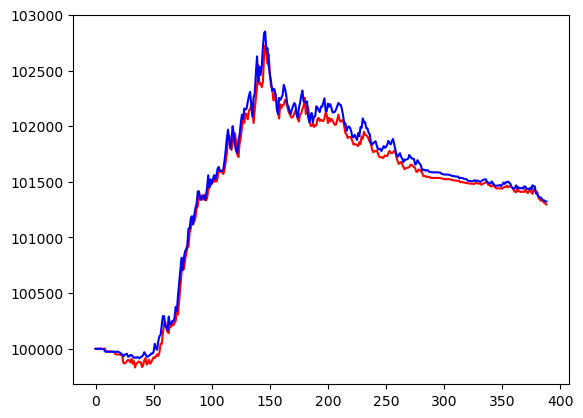

In [20]:
# Example usage:
if __name__ == "__main__":
    trading_module_pred = TradingModule()
    trading_module_actual = TradingModule()

    # Simulate a series of price updates for a hypothetical stock
    price_updates = [45, 48, 52, 55, 62, 58, 63, 60, 58, 57, 34, 45]

L = [0]*389 # Predicted List
M = [0]*389
for i, price in enumerate(predicted_price):
    #symbol = "XYZ"  # Replace with the actual symbol
    trading_module_pred.execute_strategy(price)
    #trading_module.outp()
    TotalValues_predicted = trading_module_pred.cash_balance + price * trading_module_pred.qty
    L[i] = TotalValues_predicted
    print(TotalValues_predicted)
    #trading_module.print_portfolio()
    #print("\n")
print("GAPPP")
for i, price in enumerate(actual_price):
    #symbol = "XYZ"  # Replace with the actual symbol
    trading_module_actual.execute_strategy(price)
    #trading_module.outp()
    TotalValues_actual = trading_module_actual.cash_balance + price * trading_module_actual.qty
    M[i] = TotalValues_actual
    print(TotalValues_actual)
h = np.arange(389)
plt.plot(h, L, color= 'red') # Trading with predicted Values
#asd = plt.twinx()
plt.plot(h, M, color ='blue') # TRading with actual Values
# df2['Bid_Ask_Spread'] = df2['Open']/ df2['Volume']*3000 # Take the Bid_ask spread as the ratio of the opening Price and the Volume multiplied by a constant

